In [1]:
import numpy as np
from numpy import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#加载数据
freq_test = '1H' # 测试时间周期 '1Min, 5Min, 15Min, 30Min, 1H, 4H, 6H, 8H, 12H, 1D'

In [8]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

# 加freq参数
path = r'./min_data/VnTrader_1Min_Db' 
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance', 
         'freq': freq_test,
         'start_date':20180601000000}

In [15]:
origin = ds.bar_reader(path, props).dropna(how='any').drop(['symbol','datetime','trade_date','volume'], axis=1)
num_row = np.shape(origin)[0]
origin = origin.set_index(pd.Series(range(num_row)))


,close,high,low,open
0,7551.99,7565.93,7525.08,7555.06
1,7590.00,7699.00,7545.00,7551.99
2,7557.09,7613.77,7553.60,7589.54
3,7544.90,7570.00,7532.00,7557.09
4,7540.04,7565.00,7529.71,7544.90


In [32]:
rollNum = 5
columns = ['close', 'high', 'low', 'open']
train = origin
for j in range(1,rollNum):
    zeroDf = pd.DataFrame({s: np.full(j, np.nan) for s in columns},index=list(range(j)))
    delay = pd.concat([zeroDf, origin], axis=0,ignore_index=True)
    delay.rename(columns=lambda x:x+str(-j), inplace=True)
    train = pd.concat([train, delay], axis=1,join='inner')
train.head(17)

,close,high,low,open,close-1,high-1,low-1,open-1,close-2,high-2,low-2,open-2,close-3,high-3,low-3,open-3,close-4,high-4,low-4,open-4
0,7551.99,7565.93,7525.08,7555.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7590.00,7699.00,7545.00,7551.99,7551.99,7565.93,7525.08,7555.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7557.09,7613.77,7553.60,7589.54,7590.00,7699.00,7545.00,7551.99,7551.99,7565.93,7525.08,7555.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7544.90,7570.00,7532.00,7557.09,7557.09,7613.77,7553.60,7589.54,7590.00,7699.00,7545.00,7551.99,7551.99,7565.93,7525.08,7555.06,NaN,NaN,NaN,NaN
4,7540.04,7565.00,7529.71,7544.90,7544.90,7570.00,7532.00,7557.09,7557.09,7613.77,7553.60,7589.54,7590.00,7699.00,7545.00,7551.99,7551.99,7565.93,7525.08,7555.06
5,7554.94,7575.00,7535.00,7540.04,7540.04,7565.00,7529.71,7544.90,7544.90,7570.00,7532.00,7557.09,7557.09,7613.77,7553.60,7589.54,7590.00,7699.00,7545.00,7551.99
6,7449.27,7556.98,7420.23,7554.94,7554.94,7575.00,7535.00,7540.04,7540.04,7565.00,7529.71,7544.90,7544.90,7570.00,7532.00,7557.09,7557.09,7613.77,7553.60,7589.54
7,7485.01,7499.00,7449.18,7449.26,7449.27,7556.98,7420.23,7554.94,7554.94,7575.00,7535.00,7540.04,7540.04,7565.00,7529.71,7544.90,7544.90,7570.00,7532.00,7557.09
8,7517.84,7538.00,7477.50,7485.01,7485.01,7499.00,7449.18,7449.26,7449.27,7556.98,7420.23,7554.94,7554.94,7575.00,7535.00,7540.04,7540.04,7565.00,7529.71,7544.90
9,7483.99,7515.04,7478.43,7515.03,7517.84,7538.00,7477.50,7485.01,7485.01,7499.00,7449.18,7449.26,7449.27,7556.98,7420.23,7554.94,7554.94,7575.00,7535.00,7540.04


In [30]:
m= int(np.shape(train)[0])
labels = np.full(m, 1)
for i in range(rollNum,m):
    if (train.iloc[i+1,0]>train.iloc[i+1,3] and train.iloc[i+2,0]>train.iloc[i+2,3] and train.iloc[i+3,0]>train.iloc[i+3,3]):
        labels[i] = -1
labels[13]

-1

In [35]:
first_Open = train['open'+str(1-rollNum)]/1000
train = train.div(first_Open, axis=0)
train.head(10)

,close,high,low,open,close-1,high-1,low-1,open-1,close-2,high-2,low-2,open-2,close-3,high-3,low-3,open-3,close-4,high-4,low-4,open-4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,998.011928,1001.315675,996.644633,998.655206,998.655206,1001.977483,996.947741,1000.268694,1000.268694,1007.770951,999.806752,1004.563829,1004.624715,1019.052132,998.668442,999.593650,999.593650,1001.438771,996.031799,1000.0
5,1000.390626,1003.046879,997.750262,998.417636,998.417636,1001.722725,997.049784,999.061175,999.061175,1002.384802,997.353016,1000.675319,1000.675319,1008.180625,1000.213189,1004.972199,1005.033110,1019.466392,999.074416,1000.0
6,981.517984,995.709885,977.691665,995.441094,995.441094,998.084205,992.813794,993.477866,993.477866,996.766602,992.116782,994.118221,994.118221,997.425404,992.418513,995.724379,995.724379,1003.192552,995.264535,1000.0
7,990.461937,992.313179,985.720694,985.731280,985.732603,999.985444,981.889854,999.715499,999.715499,1002.369960,997.076917,997.743841,997.743841,1001.046699,996.376912,998.386945,998.386945,1001.708330,996.679939,1000.0
8,996.413471,999.085475,991.066813,992.062188,992.062188,993.916420,987.313284,987.323888,987.325213,1001.601082,983.476255,1001.330700,1001.330700,1003.989450,998.687855,999.355856,999.355856,1002.664051,997.986720,1000.0
9,992.566352,996.684368,991.828956,996.683041,997.055719,999.729444,991.705614,992.701630,992.701630,994.557058,987.949666,987.960276,987.961602,1002.246672,984.110164,1001.976117,1001.976117,1004.636580,999.331569,1000.0


In [2]:
def loadData(freq_test):

    # 1.加载数据
    from jaqs_fxdayu.data.dataservice import LocalDataService
    ds = LocalDataService()
 
    # 加freq参数
    path = r'./min_data/VnTrader_1Min_Db' 
    props = {'fields': 'open,high,low,close,volume',
             'symbol': 'BTCUSDT:binance', 
             'freq': freq_test,
             'start_date':20180601000000}

    #读取数据 弃掉整行为Nan的，删除'symbol','datetime','trade_date','volume'四列
    origin = ds.bar_reader(path, props).dropna(how='any').drop(['symbol','datetime','trade_date','volume'], axis=1)
    num_rows = np.shape(origin)[0]
    origin = origin.set_index(pd.Series(range(num_rows)))
    train = origin
    
    # 2.数据处理，每个样例含有最近5个时间周期的开高低收数据
    rollNum = 5
    columns = ['close', 'high', 'low', 'open']
    for j in range(1,rollNum):
        zeroDf = pd.DataFrame({s: np.full(j, np.nan) for s in columns},index=list(range(j)))
        delay = pd.concat([zeroDf, origin], axis=0,ignore_index=True)
        delay.rename(columns=lambda x:x+str(-j), inplace=True)
        train = pd.concat([train, delay], axis=1,join='inner')
    # 标签，连续3个时间周期收盘价高于开盘价的记为-1，否则记为1
    m= int(np.shape(train)[0])
    labels = np.full(m, 1)
    for i in range(rollNum,m-3):
        if (train.iloc[i+1,0]>train.iloc[i+1,3] and train.iloc[i+2,0]>train.iloc[i+2,3] and train.iloc[i+3,0]>train.iloc[i+3,3]):
            labels[i] = -1
    # 标准化处理
    first_Open = train['open'+str(1-rollNum)]/1000
    train = train.div(first_Open, axis=0)
    # 3.设置训练数据集
    trainM = int(1.0*(m-3-rollNum)) 

    train_labels = []
    train_datas = []
    for i in range(rollNum,trainM):
        train_datas.append(train.iloc[i, :(4*rollNum-1)].values)
        train_labels.append(labels[i])
    train_datas = asarray(train_datas, dtype='float32')
    train_labels = asarray(train_labels, dtype='int32')

    return (train_datas, train_labels),rollNum

In [3]:
def trainDigits(predictDf,freq_test,kTup=('rbf',10)):
    '''
    SVM主程序trainDigits
    :param kTup: 一个给出核函数信息的元组:(描述核函数类型的字符串，核函数的参数)
    :return: 返回分类器SVM的参数
    '''

    # 1. 导入训练集和测试集
#     (dataArr, labelArr), (testArr, testLabels) = loadData()
    (dataArr, labelArr),rollNum = loadData(freq_test)
    # 2. 用SMO(序列最小最优化算法)求解支持向量机的凸二次规划的对偶问题
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001,10000, kTup) # 惩罚参数C=200，容错率toler=0.0001, 指定最大循环次数maxIter=10000

    # 3. 计算训练集的分类正确率
    dataMat = mat(dataArr); labelMat = mat(labelArr).transpose()
    svIndex = nonzero(alphas.A>0)[0] # 得到优化解中非零的alpha下标(支持向量的下标)
    # 从全部数据中取出支持向量的部分
    svMat = dataMat[svIndex]; svLabel = labelMat[svIndex]
    print('本次SVM共有%d个支持向量'%shape(svMat)[0])
    m,n = shape(dataMat)
    #errorCount = 0
    correctCount, Count=0, 0
    for i in range(m):
        kernelEval = kernelTrans(svMat, dataMat[i,:], kTup) # 计算该数据点的核函数
        predict = kernelEval.T * multiply(svLabel, alphas[svIndex]) + b # 高维空间的分离超平面，即分类决策函数
        if sign(predict) < 0: 
            predictDf.iloc[i+rollNum]= -1
            Count+=1
            if labelArr[i]==-1: 
                correctCount += 1 # 若预测为负类时标签也为-1，分类正确
        else: predictDf.iloc[i+rollNum]=1
    print('测试集负类正确率为:%f'%(correctCount/Count))
    svm_data = svmData(alphas, b, svIndex, svMat, svLabel, kTup)
    print('alphas:\n',alphas,'\n','b:\n',b,'\n',)
    return predictDf, svm_data

class svmData:
    '''
    创建类以存储支持向量机的分类决策函数的参数
    '''
    def __init__(self, alphas, b, svIndex, svMat, svLabel, kTup):
        '''
        :param p, q: 标签=p,q
        :param alphas, b : 优化问题的解alphas和b
        :param svIndex: 支持向量的下标
        :param svMat: 支持向量的数据点
        :param svLabel: 支持向量的标签
        '''
        self.alphas = alphas
        self.b = b
        self.svIndex = svIndex
        self.svMat = svMat
        self.svLabel = svLabel
        self.kTup = kTup
    

# =======================以下为非线性支持向量机算法的核心部分=======================

class optStruct:
    '''
    创建类以方便地在函数之间传递数据
    '''
    def __init__(self, dataMatIn, classLabels, C, toler, kTup):
        '''
        :param dataMatIn: 数据集
        :param classLabels: 类别标签(列向量）
        :param C: 惩罚参数，调和两个目标‘间隔尽量大’和‘误分类点尽量少’的关系
        :param toler: 容错率
        :param kTup: 一个给出核函数信息的元组:(描述核函数类型的字符串，核函数的参数)
        '''
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0] # 数据的行数
        # 储存优化问题解alphas(拉格朗日函数系数)以及b*(超平面截距)，初始值全部设为0
        self.alphas = mat(zeros((self.m, 1)))
        self.b = 0
        # 全部数据点误差E的缓存，第一列标示误差是否有效，第二列是误差E的值
        self.eCache = mat(zeros((self.m, 2)))
        # m行m列的矩阵, 储存核函数K(xi,x)矩阵的计算结果
        self.K = mat(zeros((self.m, self.m)))
        for i in range(self.m):
            self.K[:, i] = kernelTrans(self.X, self.X[i, :], kTup)


def kernelTrans(X, A, kTup):
    '''
    根据所选用的核函数类型计算核函数矩阵
    :param X: 数据集矩阵
    :param A: 具体的某个数据点向量(行向量)
    :param kTup: 一个给出核函数信息的元组:(描述核函数类型的字符串，核函数的参数)
    :return: K 核函数计算结果的矩阵
    '''
    m,n = shape(X) # 数据集的行数与列数
    K = mat(zeros((m,1))) # 建立存储核函数值的m*1矩阵
    if kTup[0] =='lin': K = X * A.T # 线性核函数(相当于没有向高维空间投影)
    elif kTup[0] == 'rbf': # 高斯核函数 K(x,z) = exp(-||x-z||^2/2*sigma^2)
        for j in range(m):
            deltaRow = X[j, :] - A
            K[j] = deltaRow * deltaRow.T
        K = exp(K / (-1*kTup[1]**2))
    else: raise NameError('未知的核函数类型名')
    return K

def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup=('lin', 0)):
    '''
    SMO外循环，(第一遍遍历所有alpha)，先寻找间隔边界上的支持向量点，看其对应的是否可优化；
    若没有可优化的支持向量点，则遍历全部训练集的alpha，看是否可优化。
    在for循环对在两种遍历方式来回切换，直到没有可优化的alpha后，输出优化结果alphas和b值。
    :param dataMatIn: 数据集
    :param classLabels: 类别标签
    :param C: 惩罚参数，调和两个目标‘间隔尽量大’和‘误分类点尽量少’的关系
    :param toler: 容错率
    :param maxIter: 退出前最大的循环次数
    :param kTup: 一个给出核函数信息的元组:(描述核函数类型的字符串，核函数的参数)，默认线性核函数
    :return: 优化问题的解alphas和b
    '''
    oS = optStruct(mat(dataMatIn), mat(classLabels).transpose(), C, toler, kTup) # 实例化对象，用来容纳所有数据
    iter = 0 # 大循环计数器,当没有可继续优化的alpha，迭代计数器超过指定的最大值时会退出循环
    entireSet = True # 指示遍历全部训练集；还是只遍历支持向量点
    alphaPairsChanged = 0 # 计数本轮遍历优化了多少alpha对，若没有(=0)，则下一次循环遍历全部训练集
    while (iter < maxIter) and ((alphaPairsChanged >0) or (entireSet)):# 迭代次数超过最大值，或遍历整个集合都未对alpha对进行修改时，就退出循环
        alphaPairsChanged = 0
        if entireSet: # 遍历所有的值
            for i in range(oS.m):
                alphaPairsChanged += innerL(i, oS)
                #print('遍历全部训练集，大循环计数=%d，行号=%d，本轮已优化alpha对数=%d'%(iter,i,alphaPairsChanged))
            print('大循环计数=%d，本轮遍历全部训练集，优化alpha对数=%d'%(iter,alphaPairsChanged))
            iter += 1
        else:
            supportVectors = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0] # 返回alphas中非零的行下标，即所有支持向量对应的的行号
            for i in supportVectors:
                alphaPairsChanged += innerL(i, oS)
                #print('遍历支持向量，大循环计数=%d，行号=%d，本轮已优化alpha对数=%d'%(iter,i,alphaPairsChanged))
            print('大循环计数=%d，本轮遍历支持向量，优化alpha对数=%d'%(iter,alphaPairsChanged))
            iter +=1
        if entireSet: entireSet = False
        elif (alphaPairsChanged == 0): entireSet = True
        #print('大循环次数：%d'%iter)
    return oS.b, oS.alphas

def innerL(i, oS):
    '''
    SMO内层循环，选择能使alpha2有尽量大变化的alpha2，这样能使alpha尽快收敛于最优解，即|E2-E1|最大。
    因为alpha1已定，E1也确定了。如果E1是正的，那么选择最小的Ei作为E2；如果E1是负的，那么选择最大的Ei作为E2。
    在特殊情况下，若内层循环通过以上方法选择的alpha2不能使目标函数有足够的下降，则采用以下启发式规则继续选择alpha2：
    遍历在间隔边界上的支持向量点，依次将其对应的变量作为alpha2试用，直到目标函数有足够的下降。若找不到合适的alpha2，
    那么遍历训练数据集；若仍找不到合适的alpha2，则放弃第一个alpha1，再通过外层循环寻求另外的alpha1。
    :param i: 数据集的某一行
    :param oS: 自定义对象，存储并传递所有数据
    :returns:
        0 找不到合适的alpha2, 需要在外层循环中寻找另外的alpha1
        1 找到了合适的alpha2并更新了缓存oS.E_cache
    '''
    Ei = calcEk(oS, i)
    '''
    如果 alpha1(i)是可优化的，那么进入内循环寻找alpha2(j)。这里正间隔和负间隔都会被测试，且同时检查alpha不能等于C或0.
    由于后面alpha小于0或大于C时将被调整为0或C，因此如果在if语句中alpha已经等于0或C，就不能减小或增大了，也就不能再优化了
    '''
    if ((oS.labelMat[i]*Ei< -oS.tol) and (oS.alphas[i]<oS.C) or (oS.labelMat[i]*Ei>oS.tol) and (oS.alphas[i]>0)):
        j,Ej = selectJ(i, oS, Ei) # 按照寻找最大步长的启发式方法选择第二个alpha
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy() # 用copy()方法记录old的alpha以计算alpha改变量
        # 线性规划，由边界条件0<a<C以及y1a1+y2a2=常数(-sum(i=3~n,yiai),其中y∈{+1,-1})，因此(a1,a2) 在为边长的正方形内的线段上。
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        # 如果L=H，说明(a1,a2)所在的线段已经退化成了正方形框的顶点，alpha已不能优化，回到外循环寻找另外的alpha1
        if L==H:
            #print('L==H')
            return 0

        eta = -2.0 * oS.K[i,j] + oS.K[i,i] + oS.K[j,j] # eta=K11+K22-2*K12=||Φ(x1)-Φ(x2)||^2 
        # 由上方eta公式可知eta>=0,又在alpha优化解的公式中eta是分母，eta应>0。若eta<=0,说明alpha2无法被优化，回到外循环寻找另外的alpha1
        if eta <= 0:
            #print('eta<=0')
            return 0
        oS.alphas[j] += oS.labelMat[j] * (Ei - Ej)/eta # alpha对最优化问题沿着约束方向无不等式约束的解alpha2
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L) # 加入不等式约束，调整alpha2的值
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            #print('alpha没有足够大的变化')
            return 0 # alpha2没有足够大的改变，回到外循环寻找另外的alpha1
        # 由约束条件y1a1+y2a2=常数，alpha1应该与alpha2进行同样大小的改变，但改变方向相反，y1a1与y2a2一个增大一个减小
        oS.alphas[i] += oS.labelMat[j] * oS.labelMat[i] * (alphaJold - oS.alphas[j])
        # 根据更新的alphas设置阈值b
        b1 = oS.b - Ei - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[j, j]
        # 如果更新后的a1,a1同时满足0<a<C，则b1=b2,按哪一个更新都可以。如果a1,a2是0或C,则b1<=b<=b2的b都是满足KKT条件的阈值，此时选择中点作为新的b
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 +b2)/2.0
        updateEk(oS, i) # 根据更新的alphas和b更新Ek缓存
        return 1
    else: return 0

def selectJ(i, oS, Ei):
    '''
    选择第二个alpha，目标是具有最大步长的j,这样能使alpha尽快收敛于最优解，即|Ei-Ej|最大。
    :param i:
    :param oS:
    :param Ei:
    :return:
    '''
    maxK = -1; maxDeltaE = 0; Ej = 0 # 初始化用于寻找最大步长的临时变量
    oS.eCache[i] = [1, Ei] # 现将输入值Ei在缓存中设置为有效的，这里的有效意味着它已经计算好了。
    validEcacheList = nonzero(oS.eCache[:, 0].A)[0] # 返回eCache中非零值的下标
    if (len(validEcacheList)) > 1:
        for k in validEcacheList: # 在所有非零值上循环并选择其中使得改变最大的值
            if k == i: continue
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:
        j = selectJrand(i, oS.m) # 若为第一次循环,随机选择一个alpha值
        Ej = calcEk(oS, j)
    return j, Ej

# =======================以下为一些简单的辅助函数：========================

def selectJrand(i, m):
    '''
    随机选择一个与索引i不同的j，选择范围为0~(数据总数-1)
    :param i: alpha1的下标
    :param m: 所有alpha的总数
    :return: 随机且与i不同的j
    '''
    j = i
    while(j == i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj, H, L):
    '''
    调整大于H或小于L的alpha值，保持 L <= alpha <= H 的边界条件
    :param aj: alphaj的值
    :param H: alpha边界条件上界
    :param L: alpha边界条件下界
    :return: 经边界条件调整后的alphaj
    '''
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

def calcEk(oS, k):
    '''
    对给定的第k行的alpha值，计算预测值与类别标签的误差Ek并返回
    :param oS: 自定义对象，存储并传递所有数据
    :param k: 第k行
    :return: Ek 第k行的alpha值对应的预测值与类别标签的误差
    '''
    fXk = float(multiply(oS.alphas, oS.labelMat).T * oS.K[:,k] + oS.b) # 目前预测的类别
    Ek = fXk - float(oS.labelMat[k]) # 预测类别与类别标签的误差
    return Ek

def updateEk(oS, k):
    '''
    在对alpha对优化之后，更新缓存中所有的误差值
    :param oS: 自定义对象，存储并传递所有数据
    :param k: 第k行
    '''
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]

In [5]:
# 1.加载数据
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

# 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance', 
         'freq': freq_test,
         'start_date':20180601000000}

# Time_dict = ds.bar_reader(path, props) # props多个时间，Time_dict为字典
#读取数据 弃掉整行为Nan的，删除'symbol','datetime','trade_date','volume'四列
Time_df = ds.bar_reader(path, props).dropna(how='any')

#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv = HFDataView()
dv.create_init_dv(Time_df.set_index(["trade_date","symbol"])) # dataview设为双索引


Initialize dataview success.


In [6]:
# 计算支持向量机分类器
predictDf, svm_data = trainDigits(dv.get_ts('close'),freq_test)

大循环计数=0，本轮遍历全部训练集，优化alpha对数=745
大循环计数=1，本轮遍历支持向量，优化alpha对数=657
大循环计数=2，本轮遍历支持向量，优化alpha对数=285
大循环计数=3，本轮遍历支持向量，优化alpha对数=169
大循环计数=4，本轮遍历支持向量，优化alpha对数=121
大循环计数=5，本轮遍历支持向量，优化alpha对数=105
大循环计数=6，本轮遍历支持向量，优化alpha对数=83
大循环计数=7，本轮遍历支持向量，优化alpha对数=67
大循环计数=8，本轮遍历支持向量，优化alpha对数=57
大循环计数=9，本轮遍历支持向量，优化alpha对数=39
大循环计数=10，本轮遍历支持向量，优化alpha对数=35
大循环计数=11，本轮遍历支持向量，优化alpha对数=37
大循环计数=12，本轮遍历支持向量，优化alpha对数=29
大循环计数=13，本轮遍历支持向量，优化alpha对数=24
大循环计数=14，本轮遍历支持向量，优化alpha对数=26
大循环计数=15，本轮遍历支持向量，优化alpha对数=20
大循环计数=16，本轮遍历支持向量，优化alpha对数=9
大循环计数=17，本轮遍历支持向量，优化alpha对数=9
大循环计数=18，本轮遍历支持向量，优化alpha对数=11
大循环计数=19，本轮遍历支持向量，优化alpha对数=12
大循环计数=20，本轮遍历支持向量，优化alpha对数=14
大循环计数=21，本轮遍历支持向量，优化alpha对数=5
大循环计数=22，本轮遍历支持向量，优化alpha对数=7
大循环计数=23，本轮遍历支持向量，优化alpha对数=7
大循环计数=24，本轮遍历支持向量，优化alpha对数=6
大循环计数=25，本轮遍历支持向量，优化alpha对数=7
大循环计数=26，本轮遍历支持向量，优化alpha对数=1
大循环计数=27，本轮遍历支持向量，优化alpha对数=4
大循环计数=28，本轮遍历支持向量，优化alpha对数=0
大循环计数=29，本轮遍历全部训练集，优化alpha对数=97
大循环计数=30，本轮遍历支持向量，优化alpha对数=53
大循环计数=31，本轮遍历支持向量，优化alpha对数=33
大循环计数=32，本轮遍历支持向量，优化

KeyboardInterrupt: 

In [ ]:
dv.append_df(predictDf,'SVM')
dv.get_ts('SVM')[6:20]

In [ ]:
# 与sklearn结果对比

from sklearn.svm import SVC
clf = SVC(gamma='auto')
(dataArr, labelArr),rollNum = loadData('1H')
clf.fit(dataArr, labelArr)
a = clf.predict(dataArr)
dv.get_ts('close')[2692-2679:][a == -1]

In [7]:
# 定义策略
# 进场信号
dv.add_formula("long","If(SVM==-1,2,0)",add_data=True)
# 出场信号(经过3个bar出场)
close_long = dv.add_formula('closeLong','If(Delay(SVM,3)==-1,1,0)',add_data=True)

In [8]:
#观察出现做多信号的时间点
long_plt = dv.get_ts('long', date_type='datetime')
long_plt[long_plt==2].dropna()

symbol,BTCUSDT:binance
trade_date,
2018-06-01 13:00:00,2.0
2018-06-02 08:00:00,2.0
2018-06-02 23:00:00,2.0
2018-06-03 00:00:00,2.0
2018-06-03 10:00:00,2.0
2018-06-03 11:00:00,2.0
2018-06-04 14:00:00,2.0
2018-06-06 17:00:00,2.0
2018-06-07 02:00:00,2.0


In [9]:
#观察出现平多仓信号的时间点
closeLong_plt = dv.get_ts('closeLong', date_type='datetime')
closeLong_plt[closeLong_plt==1].dropna()

symbol,BTCUSDT:binance
trade_date,
2018-06-01 16:00:00,1.0
2018-06-02 11:00:00,1.0
2018-06-03 02:00:00,1.0
2018-06-03 03:00:00,1.0
2018-06-03 13:00:00,1.0
2018-06-03 14:00:00,1.0
2018-06-04 17:00:00,1.0
2018-06-06 20:00:00,1.0
2018-06-07 05:00:00,1.0


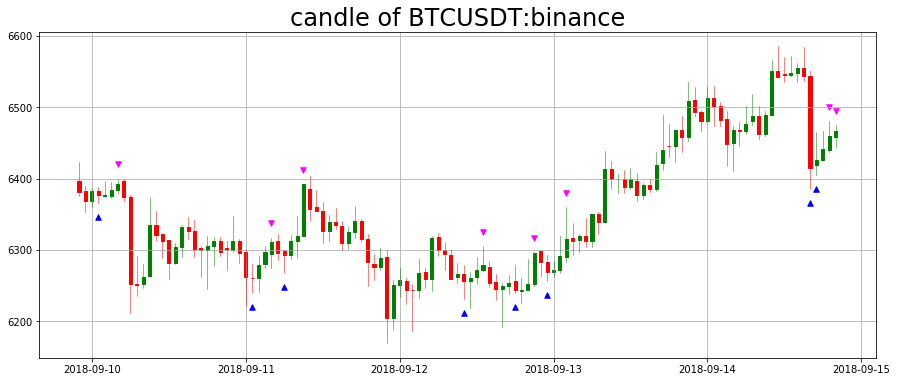

In [10]:
# 准备蜡烛图的数据
from matplotlib.pylab import date2num
start = '2018-09-09 22:00:00'# 绘图时间范围
end = '2018-09-14 20:00:00'
data = Time_df.dropna(how='any').set_index('datetime').loc[start:end] # dataframe设为datetime单索引 
# data = Time_dict[freq_test].dropna(how='any').set_index('datetime').loc[start:end] # dataframe设为datetime单索引 # props多个时间，Time_dict为字典
data['candleTime'] = list(map(date2num, data.index))
candle = data.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

# 准备做多点坐标数据
scatterXL = long_plt[long_plt==2].dropna().index
scatterYL = data.loc[scatterXL].low-20
# 准备平多仓坐标数据
scatterXS= closeLong_plt[closeLong_plt==1].dropna().index
scatterYS = data.loc[scatterXS].high+20

# 绘制蜡烛图和指标曲线

import talib as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf

fig, (ax) = plt.subplots(1,1,figsize=(15,6))
ax.grid(True)
ax.set_title('candle of BTCUSDT:binance',fontsize=24) 
mpf.candlestick_ohlc(ax, candle, width=0.02, colorup='g', colordown='r',alpha=1.0)
ax.scatter(scatterXL, scatterYL, color='b', s=30, marker='^')
ax.scatter(scatterXS, scatterYS, color='magenta', s=30, marker='v')
ax.xaxis_date()
plt.show()

In [11]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdFisher = TimingDigger(output_folder=".", output_format='pdf',signal_name='SVM')

def TimingSignal(td, dv, long='long', closeLong='closeLong'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
    
TimingSignal(tdFisher, dv, mhp=100, sl=0.05, sp=0.3)#调取数据

/anaconda3/lib/python3.6/site-packages/jaqs/research/signaldigger/plotting.py:10: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


Nan Data Count (should be zero) : 0;  Percentage of effective data: 9%


In [12]:
tdFisher.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                        win    loss      all
t-stat               12.779  -3.975   10.254
p-value               0.000   0.000    0.000
mean                  0.008  -0.003    0.006
std                   0.009   0.005    0.009
info_ratio            0.890  -0.662    0.658
skewness              2.209  -2.129    1.637
kurtosis              5.420   3.490    4.897
pct5                  0.001  -0.015   -0.002
pct25                 0.002  -0.003    0.001
pct50                 0.005  -0.001    0.004
pct75                 0.009  -0.001    0.008
pct95                 0.025  -0.000    0.025
occurance           207.000  37.000  244.000
win_ratio               NaN     NaN    0.848
win_mean/loss_mean      NaN     NaN    2.239


### 通用性测试 EOSUSDT:binance

In [13]:
def loadDataTest(freq_test):

    # 1.加载数据
    from jaqs_fxdayu.data.dataservice import LocalDataService
    ds = LocalDataService()
 
    # 加freq参数
    path = r'./min_data/VnTrader_1Min_Db' 
    props = {'fields': 'open,high,low,close,volume',
             'symbol': 'EOSUSDT:binance', 
             'freq': freq_test,
             'start_date':20180601000000}

    #读取数据 弃掉整行为Nan的，删除'symbol','datetime','trade_date','volume'四列
    origin = ds.bar_reader(path, props).dropna(how='any').drop(['symbol','datetime','trade_date','volume'], axis=1)
    num_rows = np.shape(origin)[0]
    origin = origin.set_index(pd.Series(range(num_rows)))
    train = origin
    
    # 2.数据处理，每个样例含有最近5个时间周期的开高低收数据
    rollNum = 5
    columns = ['close', 'high', 'low', 'open']
    for j in range(1,rollNum):
        zeroDf = pd.DataFrame({s: np.full(j, np.nan) for s in columns},index=list(range(j)))
        delay = pd.concat([zeroDf, origin], axis=0,ignore_index=True)
        delay.rename(columns=lambda x:x+str(-j), inplace=True)
        train = pd.concat([train, delay], axis=1,join='inner')
    # 标签，连续3个时间周期收盘价高于开盘价的记为-1，否则记为1
    m= int(np.shape(train)[0])
    labels = np.full(m, 1)
    for i in range(rollNum,m-3):
        if (train.iloc[i+1,0]>train.iloc[i+1,3] and train.iloc[i+2,0]>train.iloc[i+2,3] and train.iloc[i+3,0]>train.iloc[i+3,3]):
            labels[i] = -1
    # 需要提取形状信息，每行数据调整为每行第一个时间周期的开盘价的百分比，所有列除以最后一列
    first_Open = train['open'+str(1-rollNum)]/1000
    train = train.div(first_Open, axis=0)
    # 3.设置训练数据集
    trainM = int(1.0*(m-3-rollNum)) 

    train_datas = []
    train_labels = []
    for i in range(rollNum,trainM+rollNum):
        train_datas.append(train.iloc[i, :(4*rollNum-1)].values)
        train_labels.append(labels[i])
    train_datas = asarray(train_datas, dtype='float32')
    train_labels = asarray(train_labels, dtype='int32')
    
    return (train_datas, train_labels),rollNum

def testDigits(predictDf, svm_data, freq_test, kTup=('rbf',10)):
    '''
    SVM主程序testDigits
    :param kTup: 一个给出核函数信息的元组:(描述核函数类型的字符串，核函数的参数)
    :return: 返回分类器SVM的参数
    '''

    # 1. 导入训练集和测试集
#     (dataArr, labelArr), (testArr, testLabels) = loadData()
    (dataArr, labelArr),rollNum = loadDataTest(freq_test)
    # 2. 计算测试集的分类正确率
    dataMat = mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(dataMat)
#     errorCount = 0
#     correctCount, Count=0, 0
    for i in range(m):
        kernelEval = kernelTrans(svm_data.svMat, dataMat[i,:], svm_data.kTup) # 计算该数据点的核函数
        predict = kernelEval.T * multiply(svm_data.svLabel, svm_data.alphas[svm_data.svIndex]) + svm_data.b # 高维空间的分离超平面，即分类决策函数
#         if sign(predict) < 0: predictDf.iloc[i+rollNum]= -1
#         else: predictDf.iloc[i+rollNum]=1
#         if sign(predict) != sign(labelArr[i]): errorCount += 1 # 若预测标签与类表标签正负号相反，分类错误
        if sign(predict) < 0: 
            predictDf.iloc[i+rollNum]= -1
#             Count+=1
#             if labelArr[i]==-1: 
#                 correctCount += 1 # 若预测为负类时标签也为-1，分类正确
        else: predictDf.iloc[i+rollNum]=1
#     print('测试集负类分类正确率为:%f'%(correctCount/Count))
    return predictDf

In [14]:
#加载数据

# 1.加载数据
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

# 加freq参数
path = r'./min_data/VnTrader_1Min_Db' 
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'EOSUSDT:binance', 
         'freq': freq_test,
         'start_date':20180601000000}
# Time_dict = ds.bar_reader(path, props) # props多个时间，Time_dict为字典
#读取数据 弃掉整行为Nan的，删除'symbol','datetime','trade_date','volume'四列
Time_df = ds.bar_reader(path, props).dropna(how='any')

#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv = HFDataView()
dv.create_init_dv(Time_df.set_index(["trade_date","symbol"])) # dataview设为双索引

predictDf = testDigits(dv.get_ts('close'), svm_data, freq_test)

Initialize dataview success.


In [15]:
dv.append_df(predictDf,'SVM')
#dv.get_ts('SVM').head()

# 定义策略
# 进场信号
dv.add_formula("long","If(SVM==-1,2,0)",add_data=True)
# 出场信号(其实就是拿3个时间周期)
close_long = dv.add_formula('closeLong','If(Delay(SVM,3)==-1,1,0)',add_data=True)

In [16]:
#观察出现做多信号的时间点
long_plt = dv.get_ts('long', date_type='datetime')
long_plt[long_plt==2].dropna()

symbol,EOSUSDT:binance
trade_date,
2018-06-07 22:00:00,2.0
2018-06-16 16:00:00,2.0
2018-06-17 08:00:00,2.0
2018-06-18 05:00:00,2.0
2018-06-18 06:00:00,2.0
2018-06-19 13:00:00,2.0
2018-06-21 05:00:00,2.0
2018-06-22 02:00:00,2.0
2018-06-22 03:00:00,2.0


In [17]:
#观察出现平多仓信号的时间点
closeLong_plt = dv.get_ts('closeLong', date_type='datetime')
closeLong_plt[closeLong_plt==1].dropna()

symbol,EOSUSDT:binance
trade_date,
2018-06-08 01:00:00,1.0
2018-06-16 19:00:00,1.0
2018-06-17 11:00:00,1.0
2018-06-18 08:00:00,1.0
2018-06-18 09:00:00,1.0
2018-06-19 16:00:00,1.0
2018-06-21 08:00:00,1.0
2018-06-22 05:00:00,1.0
2018-06-22 06:00:00,1.0


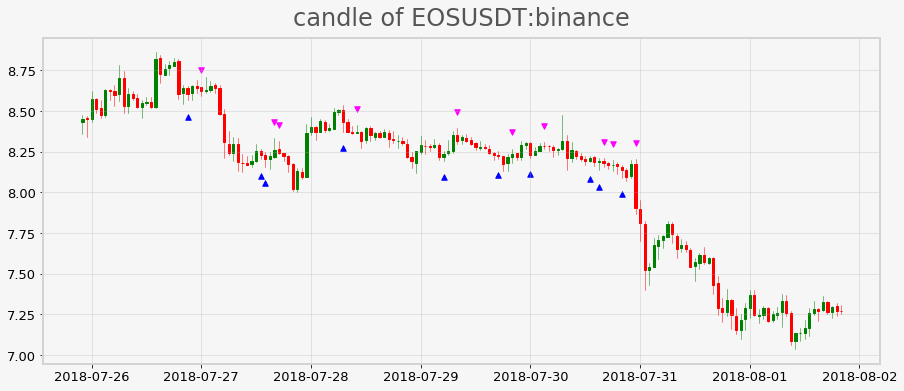

In [25]:
# 准备蜡烛图的数据
from matplotlib.pylab import date2num
start = '2018-07-25 22:00:00'# 绘图时间范围
end = '2018-08-01 20:00:00'
data = Time_df.dropna(how='any').set_index('datetime').loc[start:end] # dataframe设为datetime单索引 
# data = Time_dict[freq_test].dropna(how='any').set_index('datetime').loc[start:end] # dataframe设为datetime单索引 # props多个时间，Time_dict为字典
data['candleTime'] = list(map(date2num, data.index))
candle = data.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

# 准备做多点坐标数据
scatterXL = long_plt[long_plt==2].dropna().index
scatterYL = data.loc[scatterXL].low-0.1
# 准备平多仓坐标数据
scatterXS= closeLong_plt[closeLong_plt==1].dropna().index
scatterYS = data.loc[scatterXS].high+0.1

# 绘制蜡烛图和指标曲线

import talib as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf

fig, (ax) = plt.subplots(1,1,figsize=(15,6))
ax.grid(True)
ax.set_title('candle of EOSUSDT:binance',fontsize=24) 
mpf.candlestick_ohlc(ax, candle, width=0.02, colorup='g', colordown='r',alpha=1.0)
ax.scatter(scatterXL, scatterYL, color='b', s=30, marker='^')
ax.scatter(scatterXS, scatterYS, color='magenta', s=30, marker='v')
ax.xaxis_date()
plt.show()

In [19]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdFisher = TimingDigger(output_folder=".", output_format='pdf',signal_name='SVMtest')

def TimingSignal(td, dv, long='long', closeLong='closeLong'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
    
TimingSignal(tdFisher, dv, mhp=100, sl=0.05, sp=0.3)#调取数据
tdFisher.create_event_report(sig_type="long")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.768  -4.515  -0.286
p-value              0.001   0.000   0.776
mean                 0.010  -0.012  -0.001
std                  0.013   0.012   0.017
info_ratio           0.786  -0.941  -0.042
skewness             1.992  -1.925   0.141
kurtosis             3.358   3.715   3.033
pct5                 0.000  -0.035  -0.023
pct25                0.002  -0.016  -0.007
pct50                0.006  -0.007   0.000
pct75                0.012  -0.003   0.006
pct95                0.036  -0.002   0.027
occurance           24.000  24.000  48.000
win_ratio              NaN     NaN   0.500
win_mean/loss_mean     NaN     NaN   0.880
